Churn prediction

- 0: 0.71
- 1: 0.29

### Imbalanced data

Fraud detection
- 1: Fraud -> 1%
- 0: Not -> 99%

Multiclass
- 0: 67
- 1: 20
- 2: 13

**Accuracy = Number of true prediction / Number of true prediction**
Only effect to balance data

In [1]:
# Number of predictions: 100
# Number of true predictions: 90
# Accuracy = 90 / 100 = 90%

In [2]:
%config Completer.use_jedi = False

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [12]:
df = pd.read_clipboard(sep=',', header=None, names=['predicted', 'actual'])

In [13]:
df

,predicted,actual
0,0.0,0.0
1,1.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,1.0
5,1.0,0.0
6,0.0,0.0
7,0.0,0.0
8,1.0,1.0
9,0.0,0.0


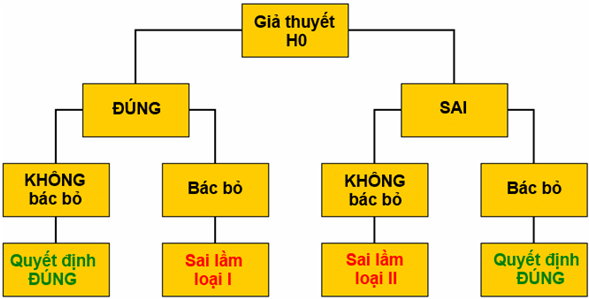

- Statistic modeling: Relationship variables
- Machine modeling: Forcast, prediction 

### Confusion matrix

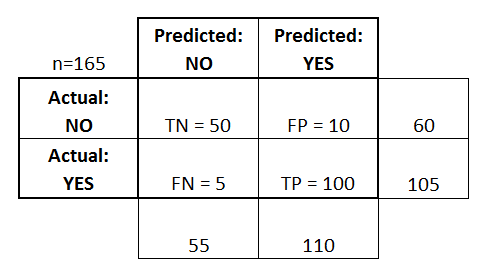

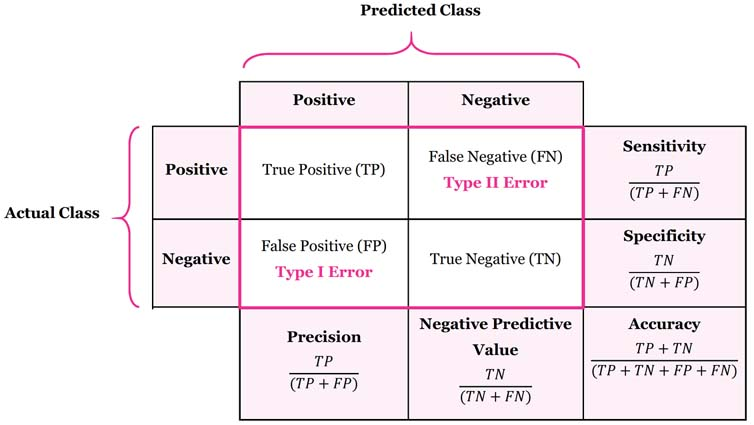![image.png]

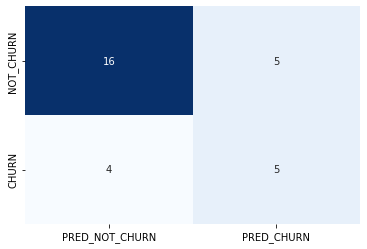

In [19]:
sns.heatmap(confusion_matrix(df.actual, df.predicted), annot=True, cmap='Blues', cbar=False, xticklabels=['PRED_NOT_CHURN', 'PRED_CHURN'], 
           yticklabels=['NOT_CHURN', 'CHURN'])
plt.show()

In [21]:
print(classification_report(df.actual, df.predicted))

              precision    recall  f1-score   support

         0.0       0.80      0.76      0.78        21
         1.0       0.50      0.56      0.53         9

    accuracy                           0.70        30
   macro avg       0.65      0.66      0.65        30
weighted avg       0.71      0.70      0.70        30



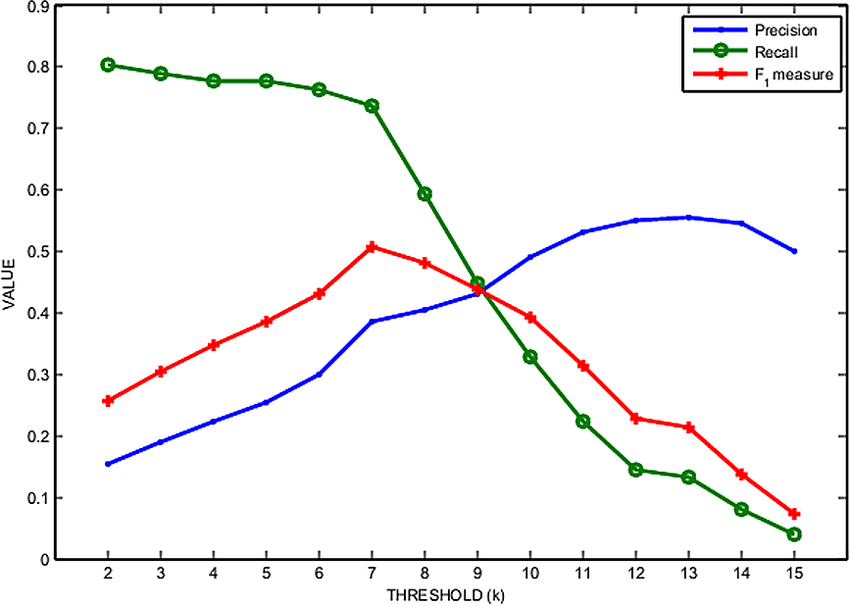

In [28]:
import pickle

In [29]:
with open('../saved_model/churn_model_v1.pickle', 'rb') as f:
    model = pickle.load(f)

In [30]:
X_test = pd.read_csv('X_test.csv')
X_test.head(2)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat
0,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.85,3.0
1,17.0,19.0,0.0,18.0,2.0,0.0,1.0,0.0,0.0,7.10,...,0.0,0.0,1.0,0.0,0.0,1.0,1.960,3.240,2.89,2.0


In [35]:
predicted_prob = model.predict_proba(X_test)[:, 1]
predicted_prob

array([0.19447363, 0.62987949, 0.00719078, 0.01709929, 0.29599469,
       0.69020771, 0.00411338, 0.45613121, 0.62638325, 0.11669929,
       0.06492876, 0.79286232, 0.59460785, 0.48846335, 0.52501736,
       0.58785367, 0.06674996, 0.46500495, 0.17159116, 0.19772099,
       0.2201928 , 0.58933758, 0.00977507, 0.23753929, 0.10265846,
       0.37786769, 0.0830107 , 0.72280444, 0.02955916, 0.61546655])

In [36]:
df['predicted_prob'] = predicted_prob

In [37]:
df

,predicted,actual,predicted_prob
0,0.0,0.0,0.194474
1,1.0,1.0,0.629879
2,0.0,0.0,0.007191
3,0.0,0.0,0.017099
4,0.0,1.0,0.295995
5,1.0,0.0,0.690208
6,0.0,0.0,0.004113
7,0.0,0.0,0.456131
8,1.0,1.0,0.626383
9,0.0,0.0,0.116699


In [40]:
from sklearn.metrics import precision_score, recall_score

In [44]:
precisions = []
recalls = []

for thresh in np.linspace(0.1, 1, 10):
    y_predicted = np.where(predicted_prob >= thresh, 1, 0)
    precisions.append(precision_score(df.actual.values.tolist(), y_predicted.tolist()))
    recalls.append(recall_score(df.actual.values.tolist(), y_predicted.tolist()))

/opt/anaconda3/envs/MCI_PYTHON_34A8_L2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/MCI_PYTHON_34A8_L2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/MCI_PYTHON_34A8_L2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


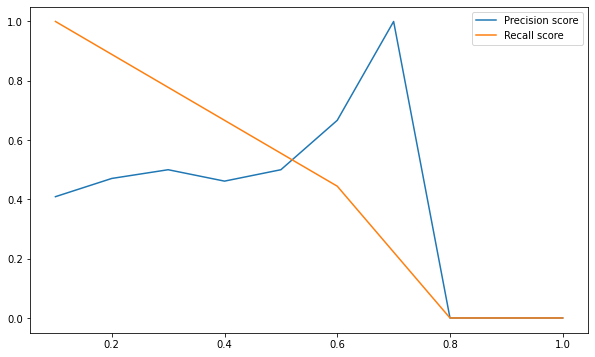

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0.1, 1, 10), precisions, label='Precision score')
plt.plot(np.linspace(0.1, 1, 10), recalls, label='Recall score')
plt.legend(loc='best');

In [48]:
X_test.describe()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,32.966667,39.900000,11.700000,62.133333,2.666667,8.400000,0.366667,0.766667,0.200000,10.695000,...,0.166667,0.233333,0.500000,0.433333,0.400000,0.366667,2.072333,3.180200,3.827167,2.300000
std,24.119649,13.956459,11.231575,62.628479,1.372974,8.168907,0.490133,0.430183,0.406838,9.045215,...,0.379049,0.430183,0.508548,0.504007,0.498273,0.490133,0.775457,0.258799,0.743978,1.055364
min,1.000000,19.000000,0.000000,14.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.916000,2.197000,2.639000,1.000000
25%,11.750000,29.750000,2.250000,25.250000,1.250000,3.250000,0.000000,1.000000,0.000000,4.212500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.437750,3.087500,3.228750,1.250000
50%,26.000000,38.000000,10.000000,47.000000,2.500000,5.500000,0.000000,1.000000,0.000000,7.625000,...,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.031000,3.240000,3.850000,2.000000
75%,53.000000,49.250000,15.000000,66.000000,4.000000,10.000000,1.000000,1.000000,0.000000,14.162500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.650500,3.240000,4.189500,3.000000
max,72.000000,75.000000,48.000000,333.000000,5.000000,30.000000,1.000000,1.000000,1.000000,37.300000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.619000,3.951000,5.808000,4.000000


### Overfit

In [50]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

In [54]:
# Training
y_train_predicted = model.predict(X_train)
print(classification_report(y_train.churn, y_train_predicted))

              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86       121
         1.0       0.69      0.49      0.57        49

    accuracy                           0.79       170
   macro avg       0.75      0.70      0.72       170
weighted avg       0.78      0.79      0.78       170



In [53]:
# Testing
print(classification_report(df.actual, df.predicted))

              precision    recall  f1-score   support

         0.0       0.80      0.76      0.78        21
         1.0       0.50      0.56      0.53         9

    accuracy                           0.70        30
   macro avg       0.65      0.66      0.65        30
weighted avg       0.71      0.70      0.70        30



### Normalization

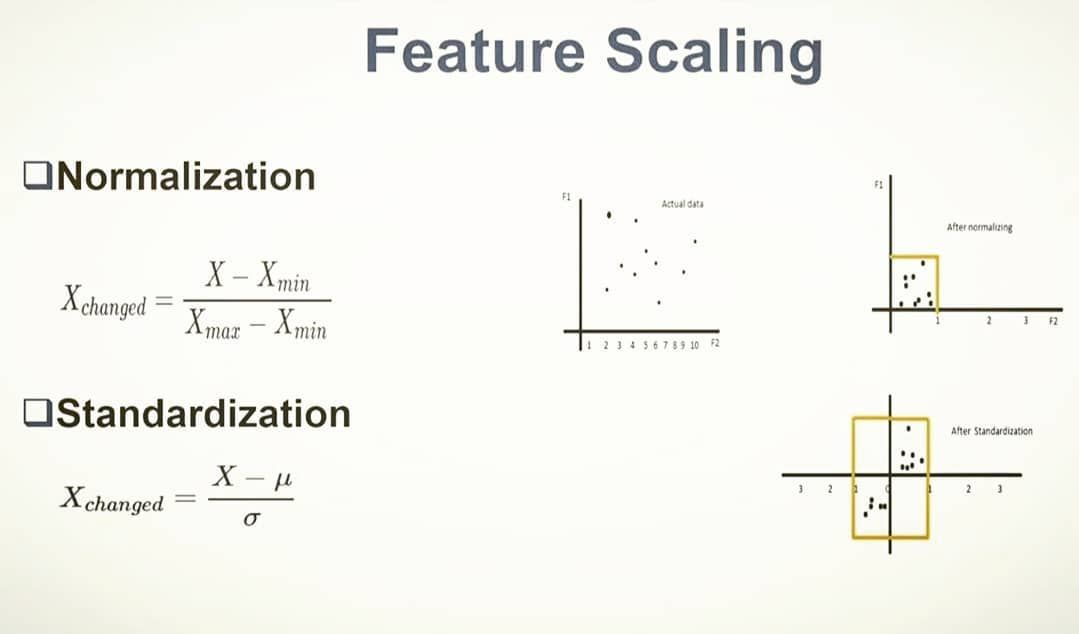

In [55]:
-np.log(0.00001)

11.512925464970229

In [56]:
-np.log(0.99)

0.01005033585350145